In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #ONLY USED TO SPLIT THE DATASET

In [2]:
#DATASET TAKEN IS ASSIGNED MEANINGFUL COLUMN NAMES FOR EASY INTERPRETATION
#Read the dataset listed in the website
df = pd.read_csv('adult.data', header=None)

# Defining column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

# Assign column names to dataframe
df.columns = columns

In [3]:
#MINIMALISTIC DATA EXPLORATION FROM CELL 3 TILL CELL 7 TO UNDERSTAND THE COLUMN VALUES HAVE BEEN DONE

# Print the first few rows of the dataset
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [4]:
# Print the shape of the dataset (number of rows, number of columns)
print(df.shape)

(32561, 15)


In [5]:
# Print summary statistics of numerical columns
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
# Print value counts for categorical columns
print(df['workclass'].value_counts())
print(df['education'].value_counts())
print(df['marital-status'].value_counts())
print(df['occupation'].value_counts())
print(df['relationship'].value_counts())
print(df['race'].value_counts())
print(df['sex'].value_counts())
print(df['native-country'].value_counts())
print(df['income'].value_counts())



 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

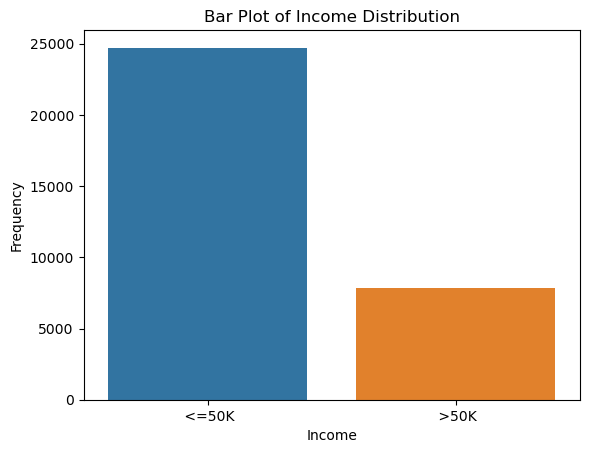

In [7]:
#DATAEXPLORATION OF THE ACTUAL INCOME DISTRIBUTION

import matplotlib.pyplot as plt
import seaborn as sns
# Create bar plot of income distribution
sns.countplot(x='income', data=df)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Bar Plot of Income Distribution')
plt.show()

In [8]:
#DATA CLEANING PROCESS BEGINS HERE
# Check for any missing values- interpreted to be none so no modification done
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [9]:
# Check for duplicate rows
print(df.duplicated().sum())

24


In [10]:
# Remove duplicate rows and check by printing
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [11]:
# Check for invalid values if any
print(df['native-country'].value_counts())


 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [12]:
# Replace invalid values with a valid value
df['native-country'].replace(' ?', 'Unknowncountry', inplace=True)


In [13]:
# Check the updated dataframe by printing some top values
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [14]:
#ONE-HOT ENCODING IS USED HERE TO CONVERT CATEGORICAL FEATURES TO NUMERICAL FEATURES
#THIS EXPANDED AND INCREASED THE NUMBER OF COLUMNS, BUT IT PREPARES BETTER PREDICTION RESULTS AND THUS IS DONE HERE

# Define the categorical feature columns
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Create dummy variables for the categorical features
df = pd.get_dummies(df, columns=cat_cols)

# Print the encoded dataframe
print(df.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  ...  \
0   <=50K             0                       0                     0  ...   
1   <=50K             0                       0                     0  ...   
2   <=50K             0                       0                     0  ...   
3   <=50K             0                       0                     0  ...   
4   <=50K             0                       0                     0  ...   

   native-country_ Puerto-Rico  native-country_ Scotland  \
0       

In [15]:
from sklearn.preprocessing import StandardScaler #THIS IS ONLY USED FOR NORMALIZING THE VALUES AS A STEP OF PREPROCESSING 

# Create a StandardScaler object
scaler = StandardScaler()

# Select the numerical columns to be normalized
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Normalize the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
#The shape has been modified after ONE-HOT ENCODING
df.shape

(32537, 109)

In [17]:
# Create the feature matrix and target vector
X = df.drop('income', axis=1)
y = df['income']


In [18]:
#The value of income is mapped by >50k as "1" and <50k as "0" for easier interpretation in decision tree
y = y.map({' >50K': 1, ' <=50K': 0})

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X #print the x values 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknowncountry
0,0.030390,77516,1.134777,0.148292,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.836973,83311,1.134777,-0.145975,-0.216743,-2.222483,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.042936,215646,-0.420679,-0.145975,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.056950,234721,-1.198407,-0.145975,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.776193,338409,1.134777,-0.145975,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,257302,0.745913,-0.145975,-0.216743,-0.197650,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,0.103716,154374,-0.420679,-0.145975,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32558,1.423579,151910,-0.420679,-0.145975,-0.216743,-0.035664,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,-1.216148,201490,-0.420679,-0.145975,-0.216743,-1.655530,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
y #print the y values 

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32537, dtype: int64

In [22]:
#DECISION TREE WITHOUT ANY LIBRARIES FROM SCRATCH USING CLASSES AND SUB-FUNCTIONS:

import numpy as np
from collections import Counter


class Nodesdecided:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature #the feature the tree was split with
        self.threshold = threshold #the threshold used to divide with
        self.left = left #left node pointing to 
        self.right = right #right node pointing to
        self.value = value #value of the node which would be none in case of leaf node
        
    def is_leaf(self):
        return self.value is not None #This can be used to determine if node is leafnode or not where for any value exists would be leaf node


class DecisionTree:
    
    
    #TRAINING PART OF DECISION TREE
    
    #The function to Provide the hyperparameters
    def __init__(self, min_samples_split=2, max_depth=10, n_features=None):
        self.min_samples_split=min_samples_split #Stopping criterion from user foe the minimum sample split
        self.max_depth=max_depth #Stopping criterion from user for maximum depth of the tree
        self.n_features=n_features #Stopping criterion to add randomness of using specific features within the tree from user
        self.root=None

    #The function to fit the training data for predicting testing values later i.e.. essentially the model training call    
    def trainmodel(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features) # to make sure number of features is between X.shape and number of features
        # above statement also makes sure that the number of features are automatically assigned if not specified by user
        self.root = self._subtrees(X, y)
    
    #The function that helps in growing the trees as a recursive function to build subtrees
    def _subtrees(self, X, y, depth=0): #initial depth is 0 and is incremented as per the growth
        n_samples, n_feats = X.shape # get number of samples and features
        n_labels = len(np.unique(y)) #Grab unique values of Y to labels

        # check the stopping criteria to prevent spliting
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split): 
            leaf_value = self._leafnodevalue_assignment(y) #find out the value that is passed through as the node
            return Nodesdecided(value=leaf_value)

        feat_indexes = np.random.choice(n_feats, self.n_features, replace=False) #Select unique features randomly 

        # find the best split if stopping criterion is not achieved from best split function
        best_feature, best_thresh = self._best_split(X, y, feat_indexes)

        # create child nodes
        left_index, right_index = self._split(X[:, best_feature], best_thresh) #split threshold and feature is the best threshold and feature
        left = self._subtrees(X[left_index, :], y[left_index], depth+1) # depth+1=increase depth by 1
        right = self._subtrees(X[right_index, :], y[right_index], depth+1)
        return Nodesdecided(best_feature, best_thresh, left, right) #the new node we created with best feature we have used, best threshold we have used and the left and right values are passed back

    #The function that determines the best split
    def _best_split(self, X, y, feat_indexes): # find best threshold and index using this helper function
        best_gain = -1
        split_index, split_threshold = None, None

        for feat in feat_indexes:
            X_column = X[:, feat]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_index = feat
                    split_threshold = thr 

        return split_index, split_threshold

    #The function that defines and calculates information gain
    def _information_gain(self, y, X_column, threshold): #information gain =entropy of parent- weighted avegerage*entropy of children
        
        # calculation of parent entropy 
        Eparent = self._entropyfunc(y) 

        # create children
        left_index, right_index = self._split(X_column, threshold)

        if len(left_index) == 0 or len(right_index) == 0:
            return 0
        
        # calculate the child entropy as weighted average entropy of children
        total = len(y)
        leftsamples, rightsamples = len(left_index), len(right_index)
        leftent, rightent = self._entropyfunc(y[left_index]), self._entropyfunc(y[right_index])
        Echild = (leftsamples/total) * leftent + (rightsamples/total) * rightent #total sum of no of samples in left/total samples * leftentropy and no of samples in right/total samples * rightentropy

        # calculate the Information gain
        information_gain = Eparent - Echild
        return information_gain
    
    #The function that helps calculate left and right indices 
    def _split(self, X_column, split_thresh): 
        left_index = np.argwhere(X_column <= split_thresh).flatten() #flatten is used to reduce it as an list and not list of list while using argwhere
        right_index = np.argwhere(X_column > split_thresh).flatten()
        return left_index, right_index
    
    #The function that calculates Entropy using entropy formula
    def _entropyfunc(self, y):
        yoc = np.bincount(y) #number of occurances of y
        occu = yoc / len(y) #number of occurances/total number of values
        return -np.sum([oc * np.log(oc) for oc in occu if oc>0]) #entropy = negative summation of number of occurances/values* log number of occurances/values   

    #The function that is used to grab the value of leaf node when stopping criteria is achieved
    def _leafnodevalue_assignment(self, y):
        counter = Counter(y) 
        value = counter.most_common(1)[0][0] #counts the most common tuple and first information value 
        return value

    
    #TESTING PART OF DECISION TREE
    
    #The function that can be called to obtain the prediction
    def predict(self, predictionset):
        return np.array([self._traverse(x, self.root) for x in predictionset]) #Predicted values for everything in the test data=predictionset

    #The function to determine prediction values by returning the leaf values
    def _traverse(self, x, node): 
        if node.is_leaf():
            return node.value 

        if x[node.feature] <= node.threshold: #find if feature divided with <= threshold to check if its going to move towards left otherwise check the right
            return self._traverse(x, node.left)
        return self._traverse(x, node.right)



In [23]:
# Create a decision tree classifier
dt = DecisionTree()

In [24]:
# Train the decision tree on the training data
dt.trainmodel(X_train.values, y_train.values)

In [25]:
# Make predictions on the test data
from time import time
start_time = time()
y_pred = dt.predict(X_test.values)
end_time = time()



In [26]:
y_pred #predicted values are printed as 0s and 1s 

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [27]:
#Create a function to calculate the performance and speed metrics without any libraries

def metrics(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    precision = np.sum((y_test == 1) & (y_pred == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_test == 1) & (y_pred == 1)) / np.sum(y_test == 1)
    f1_score = 2 * precision * recall / (precision + recall)
    return accuracy, precision, recall, f1_score

In [28]:
metrics(y_test, y_pred) # checking the metrics function


(0.8532575291948371,
 0.7101167315175098,
 0.6830941983780412,
 0.6963434022257551)

In [29]:
print("Performance and Speed metrics of the Decision tree model are as follows:")

#assign the determined metric values to variables
precision, recall, f1_score, accuracy = metrics(y_test, y_pred)
print("Precision of the model:", precision)
print("Recall value:", recall)
print("F1 Score of the model:", f1_score)
print("Accuracy of the model:", accuracy)

# Calculate the time taken to make predictions
time_taken = end_time - start_time

print(f"Time taken for predictions: {time_taken:.4f} seconds")

Performance and Speed metrics of the Decision tree model are as follows:
Precision of the model: 0.8532575291948371
Recall value: 0.7101167315175098
F1 Score of the model: 0.6830941983780412
Accuracy of the model: 0.6963434022257551
Time taken for predictions: 0.0276 seconds


NameError: name 'labels' is not defined

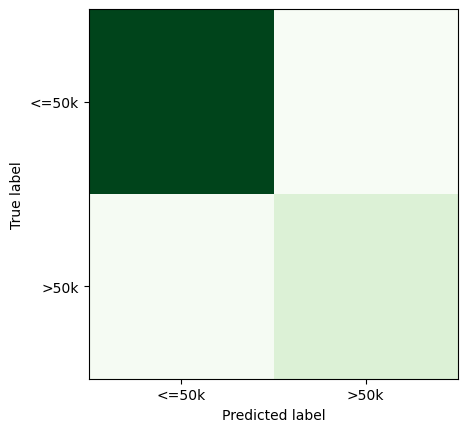

In [30]:
#Additional plotting of the determined values as a ratio to the original values as a confusion matrix.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

labels1=["<=50k",">50k"]
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Greens')

# Add axis labels
ax.set_xticks(np.arange(len(labels1)))
ax.set_yticks(np.arange(len(labels1)))
ax.set_xticklabels(labels1)
ax.set_yticklabels(labels1)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='r')

# Add a color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

In [ ]:
print("Thus,  The created Decision tree has been implemented without using any libraries from scratch and the speed and performance metrics have also been successfully listed without any libraries")